Name: Ashish M. Yadav
Project topic:Recognizing Handwritten Digits with scikit-learn

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Text(0.5, 1.0, 'Visualizing an array')

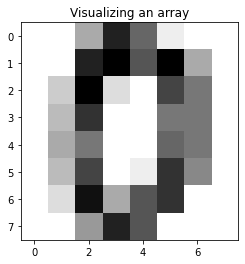

In [5]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.title('Visualizing an array')   

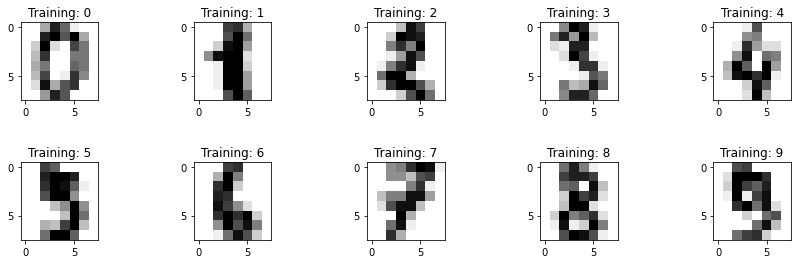

In [6]:
import numpy as np 
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label, fontsize =12)

In [7]:
n = len(digits.images)
print(n)
data = digits.images.reshape((n, -1))

1797


In [8]:
#Import svm model 
from sklearn import svm  
#Create a svm Classifier
svc = svm.SVC(gamma=0.001, C=100.)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.01, random_state=0)

In [10]:
svc.fit(x_train, y_train)
#SVC(C=100.0, gamma=0.001)
y_pred = svc.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

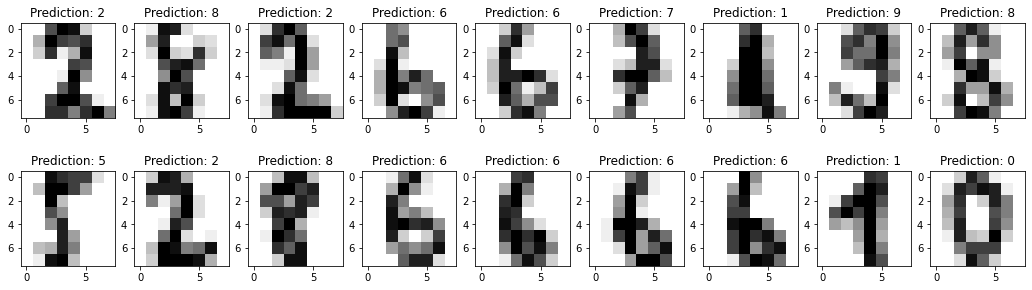

In [11]:

images_and_predictions = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

# save the figure
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

In [12]:
score = svc.score(x_test, y_test)

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



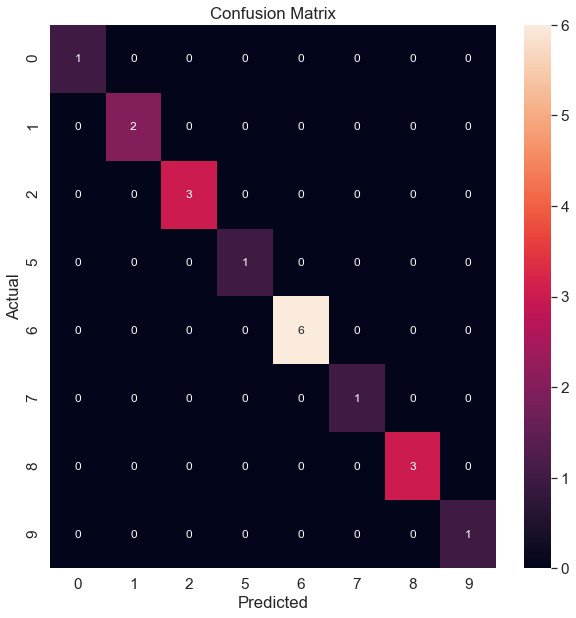

In [13]:
#For Confusion Matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size

#For Classification Report

from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print("Classification report for SVM classifier:\n\n",cr)